In [52]:
import numpy as np
import scipy as scy
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import os
from os.path import dirname

from astropy.nddata import CCDData
from astropy.visualization import hist
import ccdproc as ccdp
from astropy.stats import mad_std
from astropy.stats import sigma_clipped_stats
from astropy.io import fits
import photutils
from photutils import IterativelySubtractedPSFPhotometry
#from convenience_functions import show_image
plt.style.use('ggplot')

In [202]:
h_1 = CCDData.read('./m82/NEW_r_image_6 copy.fits', unit = 'adu', vmin= 50, vmax = 10000)
sky_flux = photutils.CircularAperture(positions = (1468, 1900), r = 100)
m82_flux= photutils.EllipticalAperture(positions = (855,1030), a=710, b=240, theta=2.73)

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


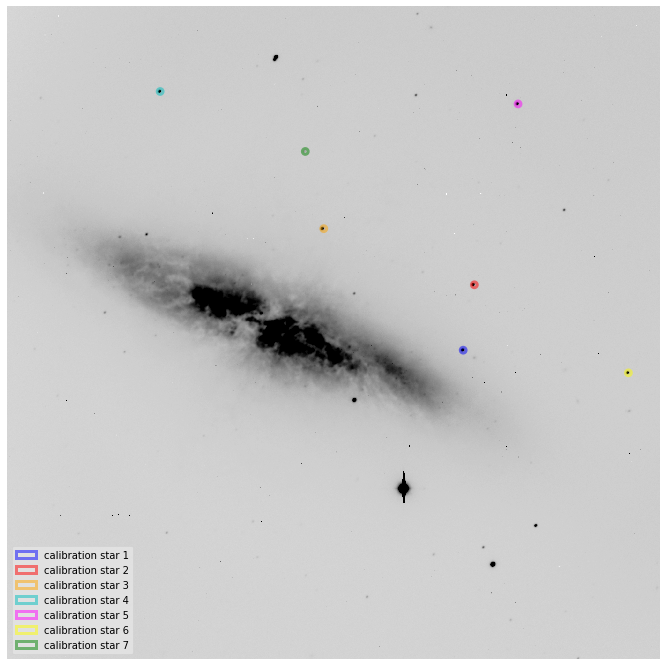

In [222]:
f1 = photutils.CircularAperture((1429,967),r = 9)
f2 = photutils.CircularAperture((1464,1172),r = 9)
f3 = photutils.CircularAperture((992,1348),r = 9)
f4 = photutils.CircularAperture((479,1778),r = 9)
f5 = photutils.CircularAperture((1601,1739),r = 9)
f6 = photutils.CircularAperture((1947,896),r = 9)
f7 = photutils.CircularAperture((934,1590),r = 9)


fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(h_1.data, cmap='Greys', origin='lower', vmin=50, vmax=10000)

f1.plot(color = 'blue', lw = 3, alpha = 0.5, label = 'calibration star 1')
f2.plot(color = 'red', lw = 3, alpha = 0.5, label = 'calibration star 2')
f3.plot(color = 'orange', lw = 3, alpha = 0.5, label = 'calibration star 3')
f4.plot(color = 'c', lw = 3, alpha = 0.5, label = 'calibration star 4')
f5.plot(color = 'magenta', lw = 3, alpha = 0.5, label = 'calibration star 5')
f6.plot(color = 'yellow', lw = 3, alpha = 0.5, label = 'calibration star 6')
f7.plot(color = 'green', lw = 3, alpha = 0.5, label = 'calibration star 7')

ax.legend(loc = 'lower left')
plt.grid(b = None)
plt.axis('off');

In [246]:
table = photutils.aperture_photometry(h_1.data, f1, method = 'exact')
table

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,1429.0,967.0,2069394.0738989883


In [201]:
sky_mask = sky_flux.to_mask(method='exact')

In [11]:
files = ccdp.ImageFileCollection('./m82')

/Users/henryginder/miniconda3/lib/python3.7/site-packages/ccdproc/image_collection.py:546: UserWarning: Header from file "./m82/NEW_halpha_image_0 copy.fits" contains multiple entries for "mjd-obs", the pair "mjd-obs=58240.19454916" will be ignored.
  UserWarning)
/Users/henryginder/miniconda3/lib/python3.7/site-packages/ccdproc/image_collection.py:546: UserWarning: Header from file "./m82/NEW_halpha_image_1 copy.fits" contains multiple entries for "mjd-obs", the pair "mjd-obs=58240.197764236" will be ignored.
  UserWarning)
/Users/henryginder/miniconda3/lib/python3.7/site-packages/ccdproc/image_collection.py:546: UserWarning: Header from file "./m82/NEW_halpha_image_2 copy.fits" contains multiple entries for "mjd-obs", the pair "mjd-obs=58240.202154604" will be ignored.
  UserWarning)
/Users/henryginder/miniconda3/lib/python3.7/site-packages/ccdproc/image_collection.py:546: UserWarning: Header from file "./m82/NEW_halpha_image_3 copy.fits" contains multiple entries for "mjd-obs", the 

In [116]:
i = 0

results = [None]*11

for x in files:
    
    r_hdu = x.to_hdu()
    
    r_hdu = r_hdu[0].header

    file_name = r_hdu['FILENAME']
    
    exp = r_hdu['exptime']
    
    results[i] = photutils.aperture_photometry(x.data, m82_flux, method = 'exact')
    
    sky_data = sky_mask.multiply(x.data)
    
    sky_data_1d = sky_data[sky_mask.data > 0]
    
    _, median, _ = sigma_clipped_stats(sky_data_1d)
    
    bkg_median = median
    
    bkg_median = np.array(bkg_median)
    
    results[i]['filename'] = file_name
    
    results[i]['exp'] = exp
    
    results[i]['sky_median'] = bkg_median
    
    results[i]['sky_bkg'] = bkg_median * m82_flux.area
    
    results[i]['REAL_photometry'] = results[i]['aperture_sum'] - results[i]['sky_bkg']

    i +=1

TypeError: 'ImageFileCollection' object is not iterable

In [113]:
results[0]

In [114]:
p1 = results[0]['REAL_photometry'][0] / results[0]['exp'][0]
p2 = results[1]['REAL_photometry'][0] / results[1]['exp'][0]
p3 = results[2]['REAL_photometry'][0] / results[2]['exp'][0]
p4 = results[3]['REAL_photometry'][0] / results[3]['exp'][0]

alpha = [p1, p2, p3, p4]

TypeError: 'NoneType' object is not subscriptable

In [115]:
np.mean(alpha)

NameError: name 'alpha' is not defined

In [14]:
from astropy import units as u
from astropy import constants as const
from astropy.units import imperial

In [226]:
freq = const.c / (656.28 * u.nm)
E = const.h * freq * 1357400
E.to(u.erg)

<Quantity 4.10861463e-06 erg>

In [241]:
L = E / (((3.5/2 * u.m)**2 /np.sqrt(2) * u.s)) * (11.42 * 10**6 * u.lyr)**2
L.decompose()

<Quantity 2.21470485e+33 kg m2 / s3>

In [242]:
L.to(u.erg / u.s)

<Quantity 2.21470485e+40 erg / s>

In [233]:
h = E / ((61440 *10**(-6) * u.m)**2 * u.s)

In [234]:
h.decompose()

<Quantity 1.08841118e-10 kg / s3>

In [243]:
7.9* 10 **(-42) *2.2147 * 10**40

0.17496130000000004

In [266]:
hi = 3606 * ((u.joule) /((u.s)*(u.m)**2)) * const.h * const.c / (623.1 * 10**(-9)* u.m)

In [282]:
dd = const.h * const.c / (623.1 * 10**(-9)* u.m)
ggg = 3606 * u.joule / dd

ggg.decompose()

<Quantity 1.13111495e+22>

In [269]:
ho = hi * const.h
ho

<Quantity 2.3893609e-30 J2 / m2>

In [272]:
he = ho * const.c
g = he / u.m

<Quantity 7.16312376e-22 kg2 m2 / s5>